<pre>
Name: Ritika Sarkar 
Reg. No.: 19BAI1031 
Faculty: Dr. G. Suganya 
Slot: L3 + L4 
Course Code: CSE1015 
Date: 01.03.2021
</pre>

Link to Dataset: https://data.world/data-society/horse-racing-tipster-bets

<h3>Decision Tree using Entropy</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz
# from six import StringIO
# from IPython.display import Image
# import pydotplus

In [25]:
df = pd.read_csv('heart.csv')

In [26]:
df.shape

(303, 14)

In [27]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [28]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [29]:
len(df['sex'].unique())

2

In [30]:
len(df['cp'].unique())

4

<h5>Target column</h5>

In [31]:
len(df['target'].unique())

2

<h4>Make training set</h4>

In [32]:
X=df.iloc[:,:-1]
Y=df.iloc[:,13]

In [33]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [34]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Label Encoding (not required here since all values are already in numerical form)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# label = LabelEncoder()
# df['col']= label.fit_transform(df['col']) 

<h4>Decision Tree Classifier</h4>

In [35]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy')

<h4>Visualisation</h4>

The following code gives error that's why done using sklearn and matplotlib

In [ ]:
# dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True,special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png(), width = 800 ,height = 300)

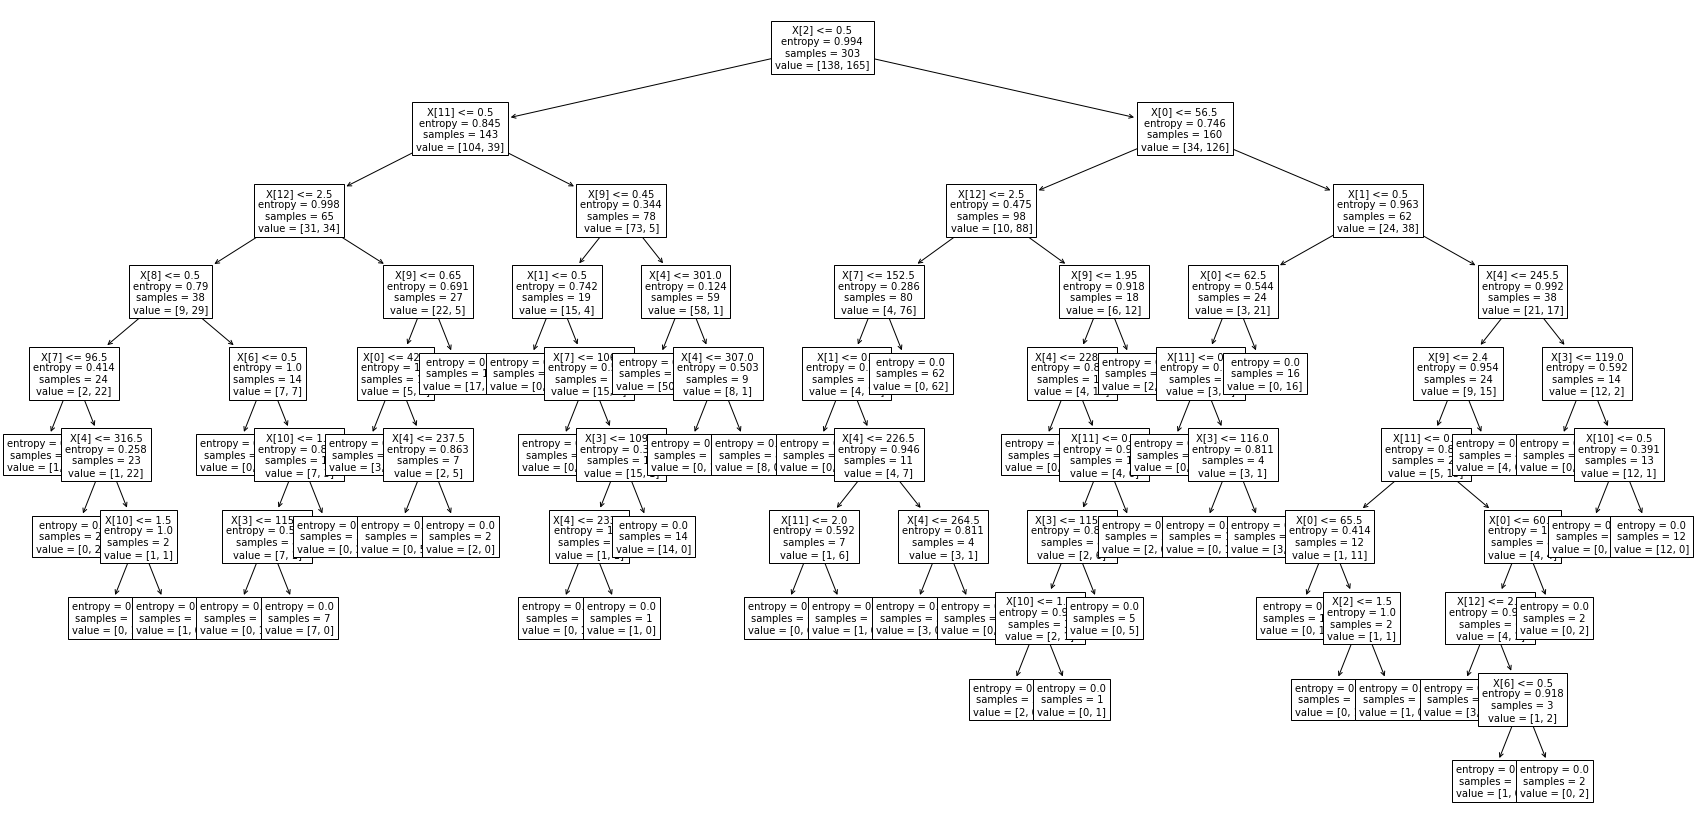

In [62]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))
plot_tree(tree,fontsize=10)
plt.show()

In [54]:
y_pred = tree.predict(X)
df['Predict']=y_pred
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  Predict  
0   0     1       1        1  
1   0     2       1        1  
2   0     2       1        1  
3   0     2       1        1  
4   0     2       1        1

<h4>Error metrics</h4>

In [39]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(Y,y_pred))

Accuracy:  1.0


Confusion matrix

In [43]:
print("Confusion matrix: ") 
print(metrics.confusion_matrix(Y,y_pred))

Confusion matrix: 
[[138   0]
 [  0 165]]


<h4>Comparison with Logistic Regression accuracy</h4>

The accuracy for this dataset in Logistic regression was 85.15%.
In this decision tree model, we got an accuracy of 100%, which tells us that decision tree predicts perfectly for the dataset. If we limit the tree using max_depth, then we may get lower accuracy than the current model